In [260]:
# Lets predict a classification - Survival or deceased
# We are using semi-cleaned version of titanic data set


In [261]:
# Import librries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [262]:
# Importing train dataset
titanic_train = pd.read_csv('titanic_train.csv')

In [263]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


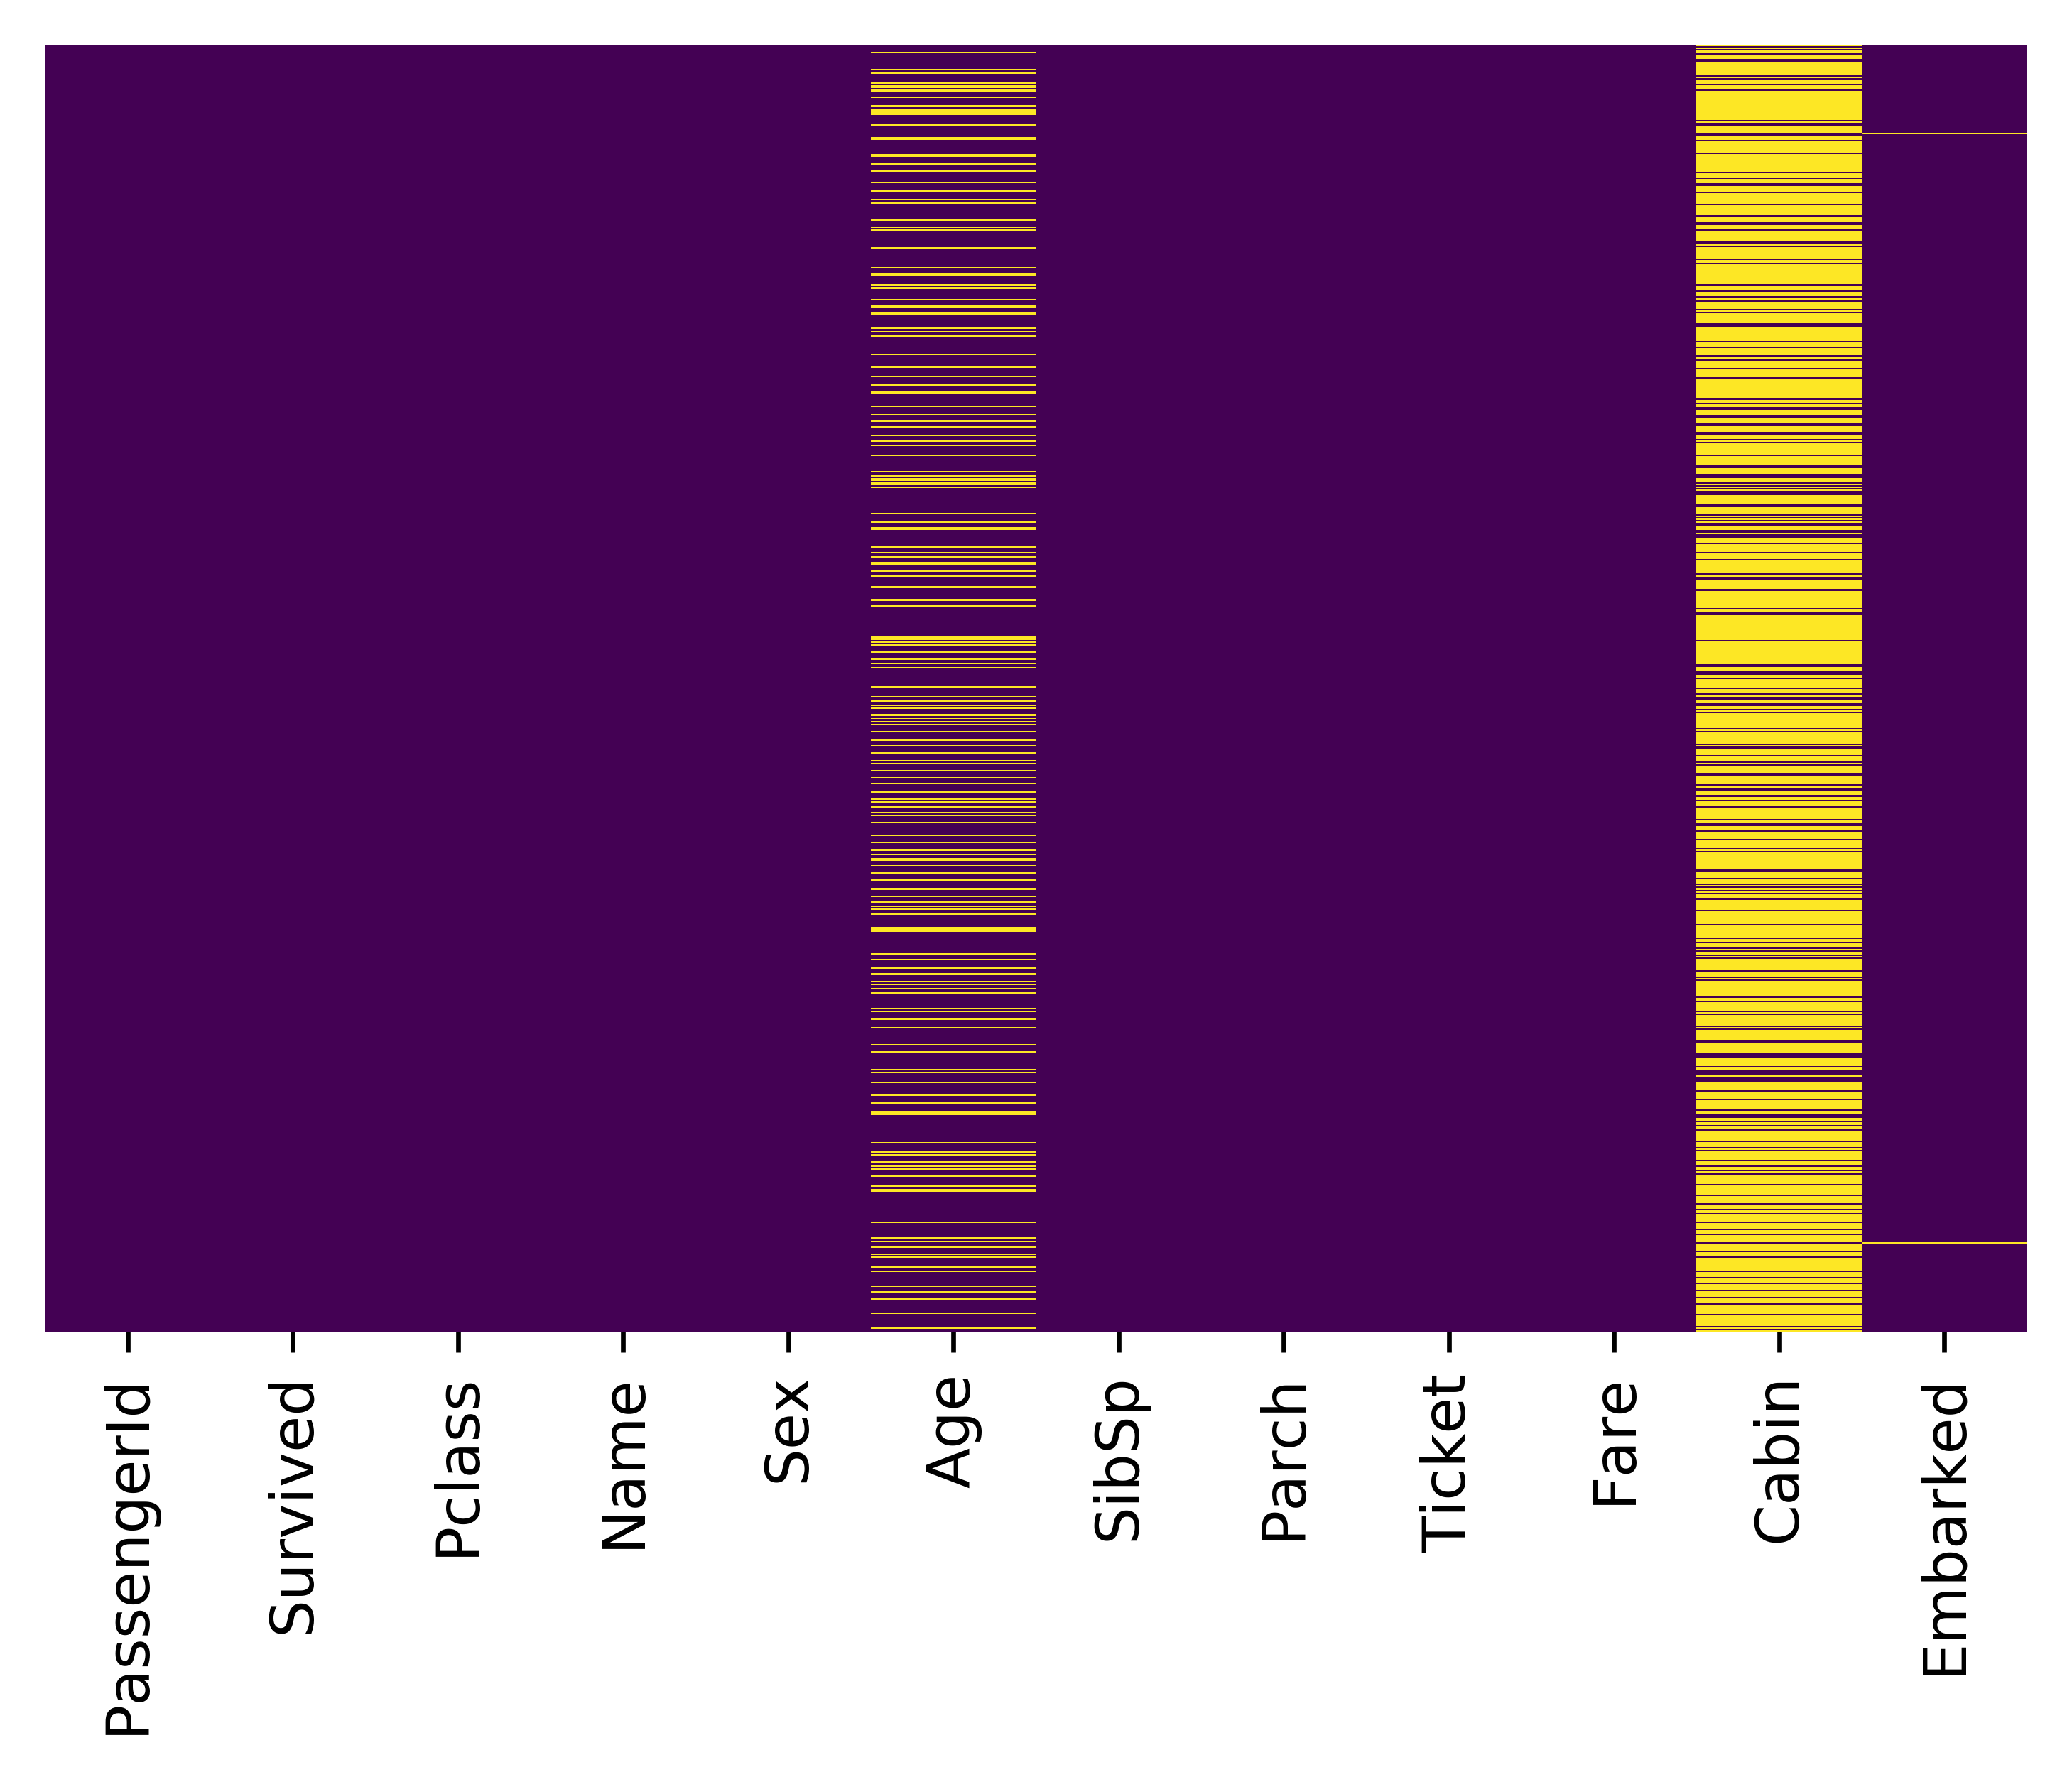

In [264]:
# check the missing data in dataset
fig = plt.figure(dpi = 600)
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,
           cmap='viridis')

In [265]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [266]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [267]:

'''
Arround 20% of data for age is missing
The proportion of Age missing is likely small 
enough for reasonable replacement with some form of imputation.
Looking at the Cabin column, it looks like we are just 
missing too much of that data to do something useful with 
at a basic level.
'''


'\nArround 20% of data for age is missing\nThe proportion of Age missing is likely small \nenough for reasonable replacement with some form of imputation.\nLooking at the Cabin column, it looks like we are just \nmissing too much of that data to do something useful with \nat a basic level.\n'

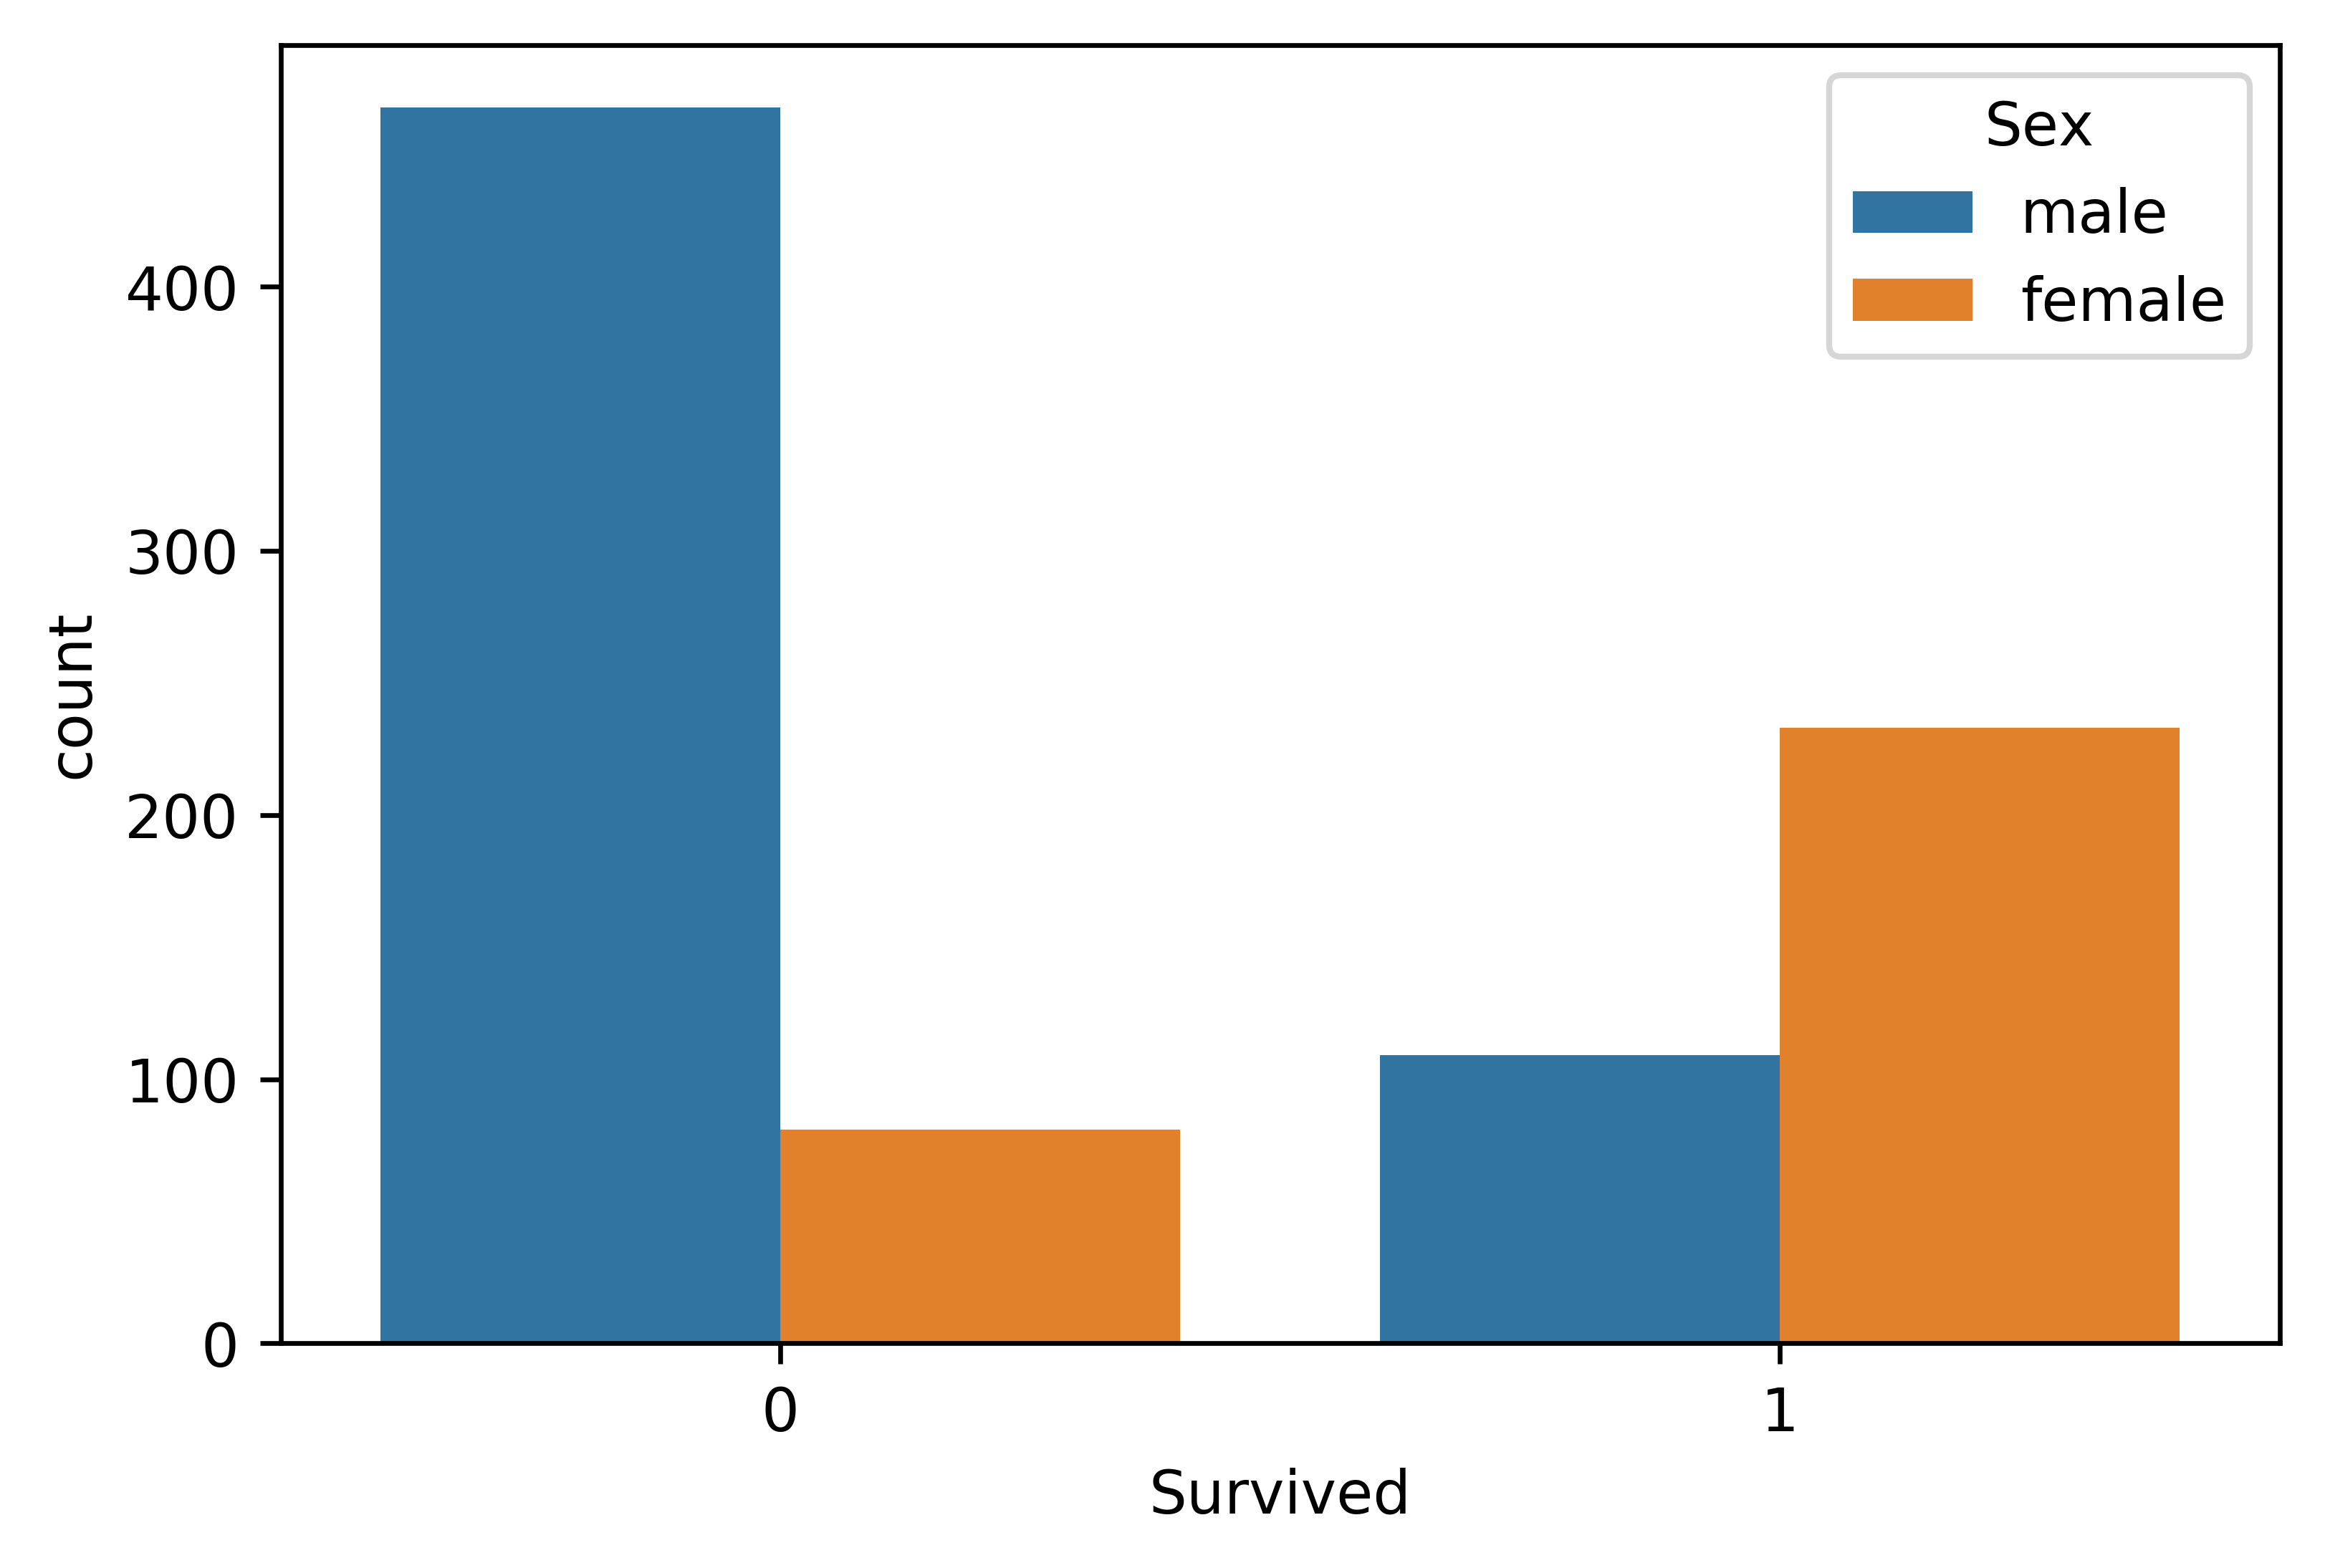

In [268]:
# Check the survival rate with respect to Sex of passanger

fig = plt.figure(dpi = 600)
sns.countplot(x='Survived', hue='Sex',data=titanic_train)

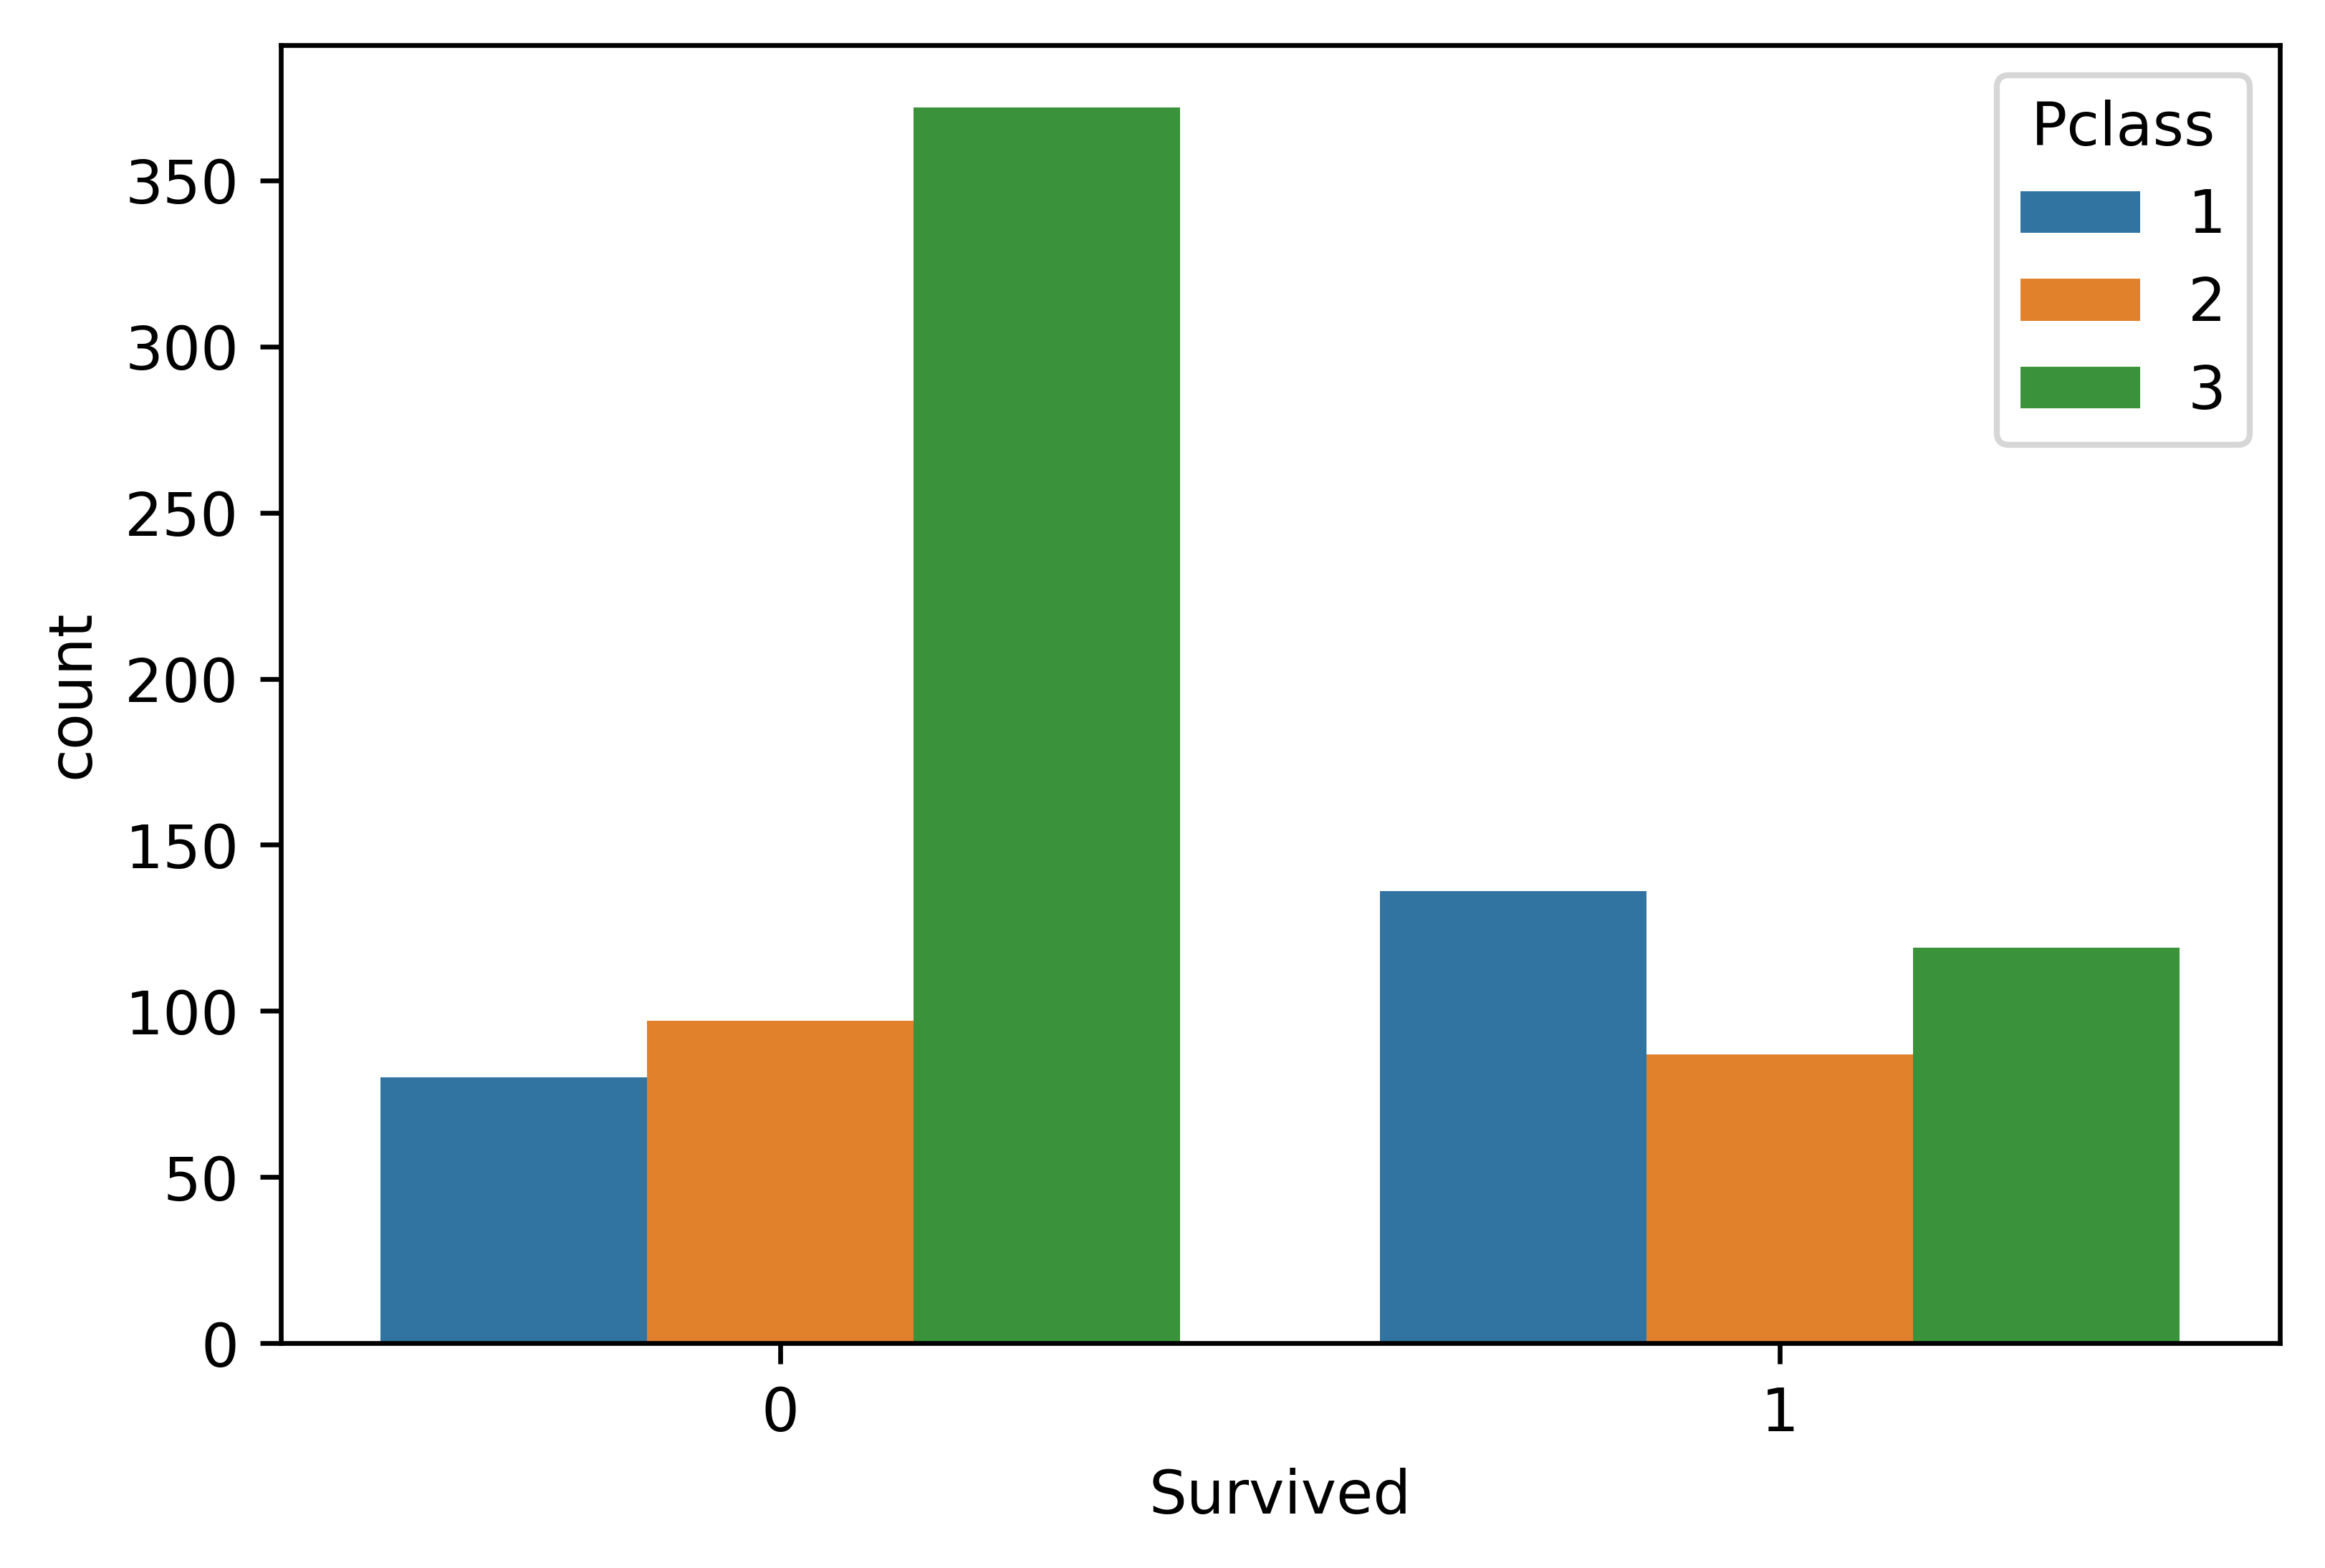

In [269]:
# Check the survival rate with respect to passenger class

fig = plt.figure(dpi = 600)
sns.countplot(x='Survived', hue='Pclass',data=titanic_train)

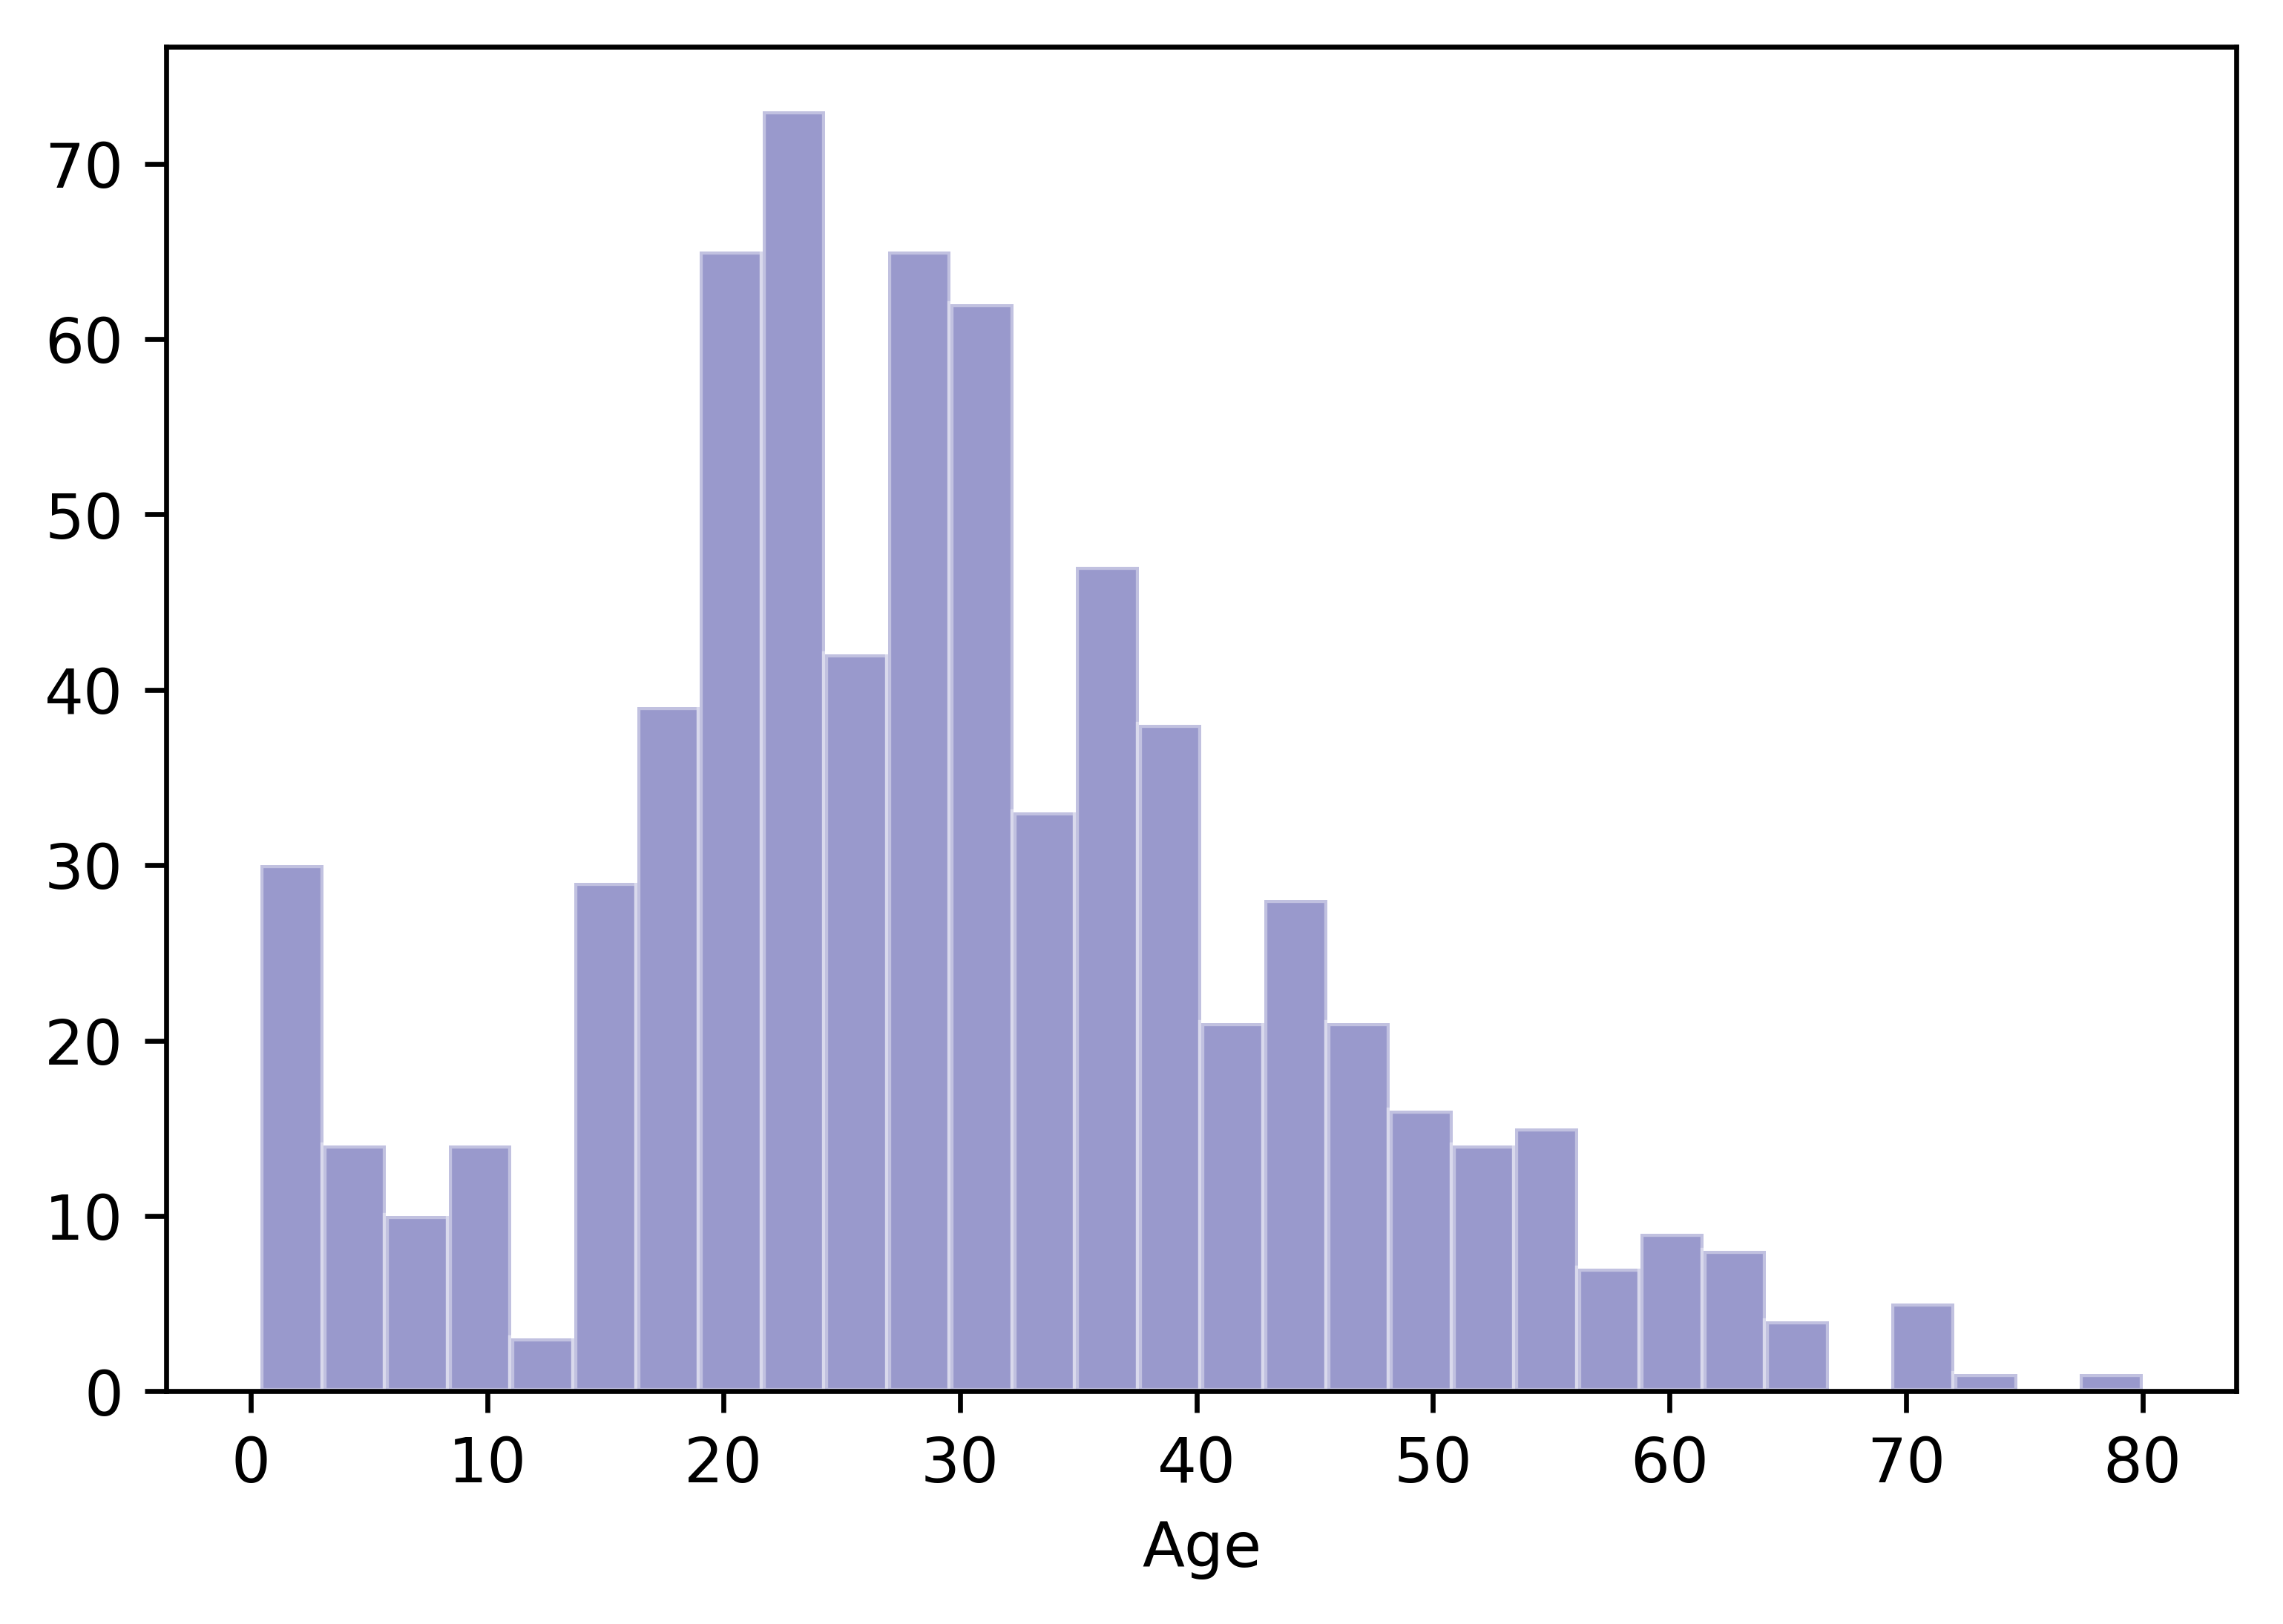

In [270]:
# Lets check the age of passenger in titanic
fig = plt.figure(dpi = 600)
sns.distplot(titanic_train['Age'].dropna(),bins=30,
             hist_kws={'ec':'white'},kde=False,color='navy')
# Bimodal distribution 

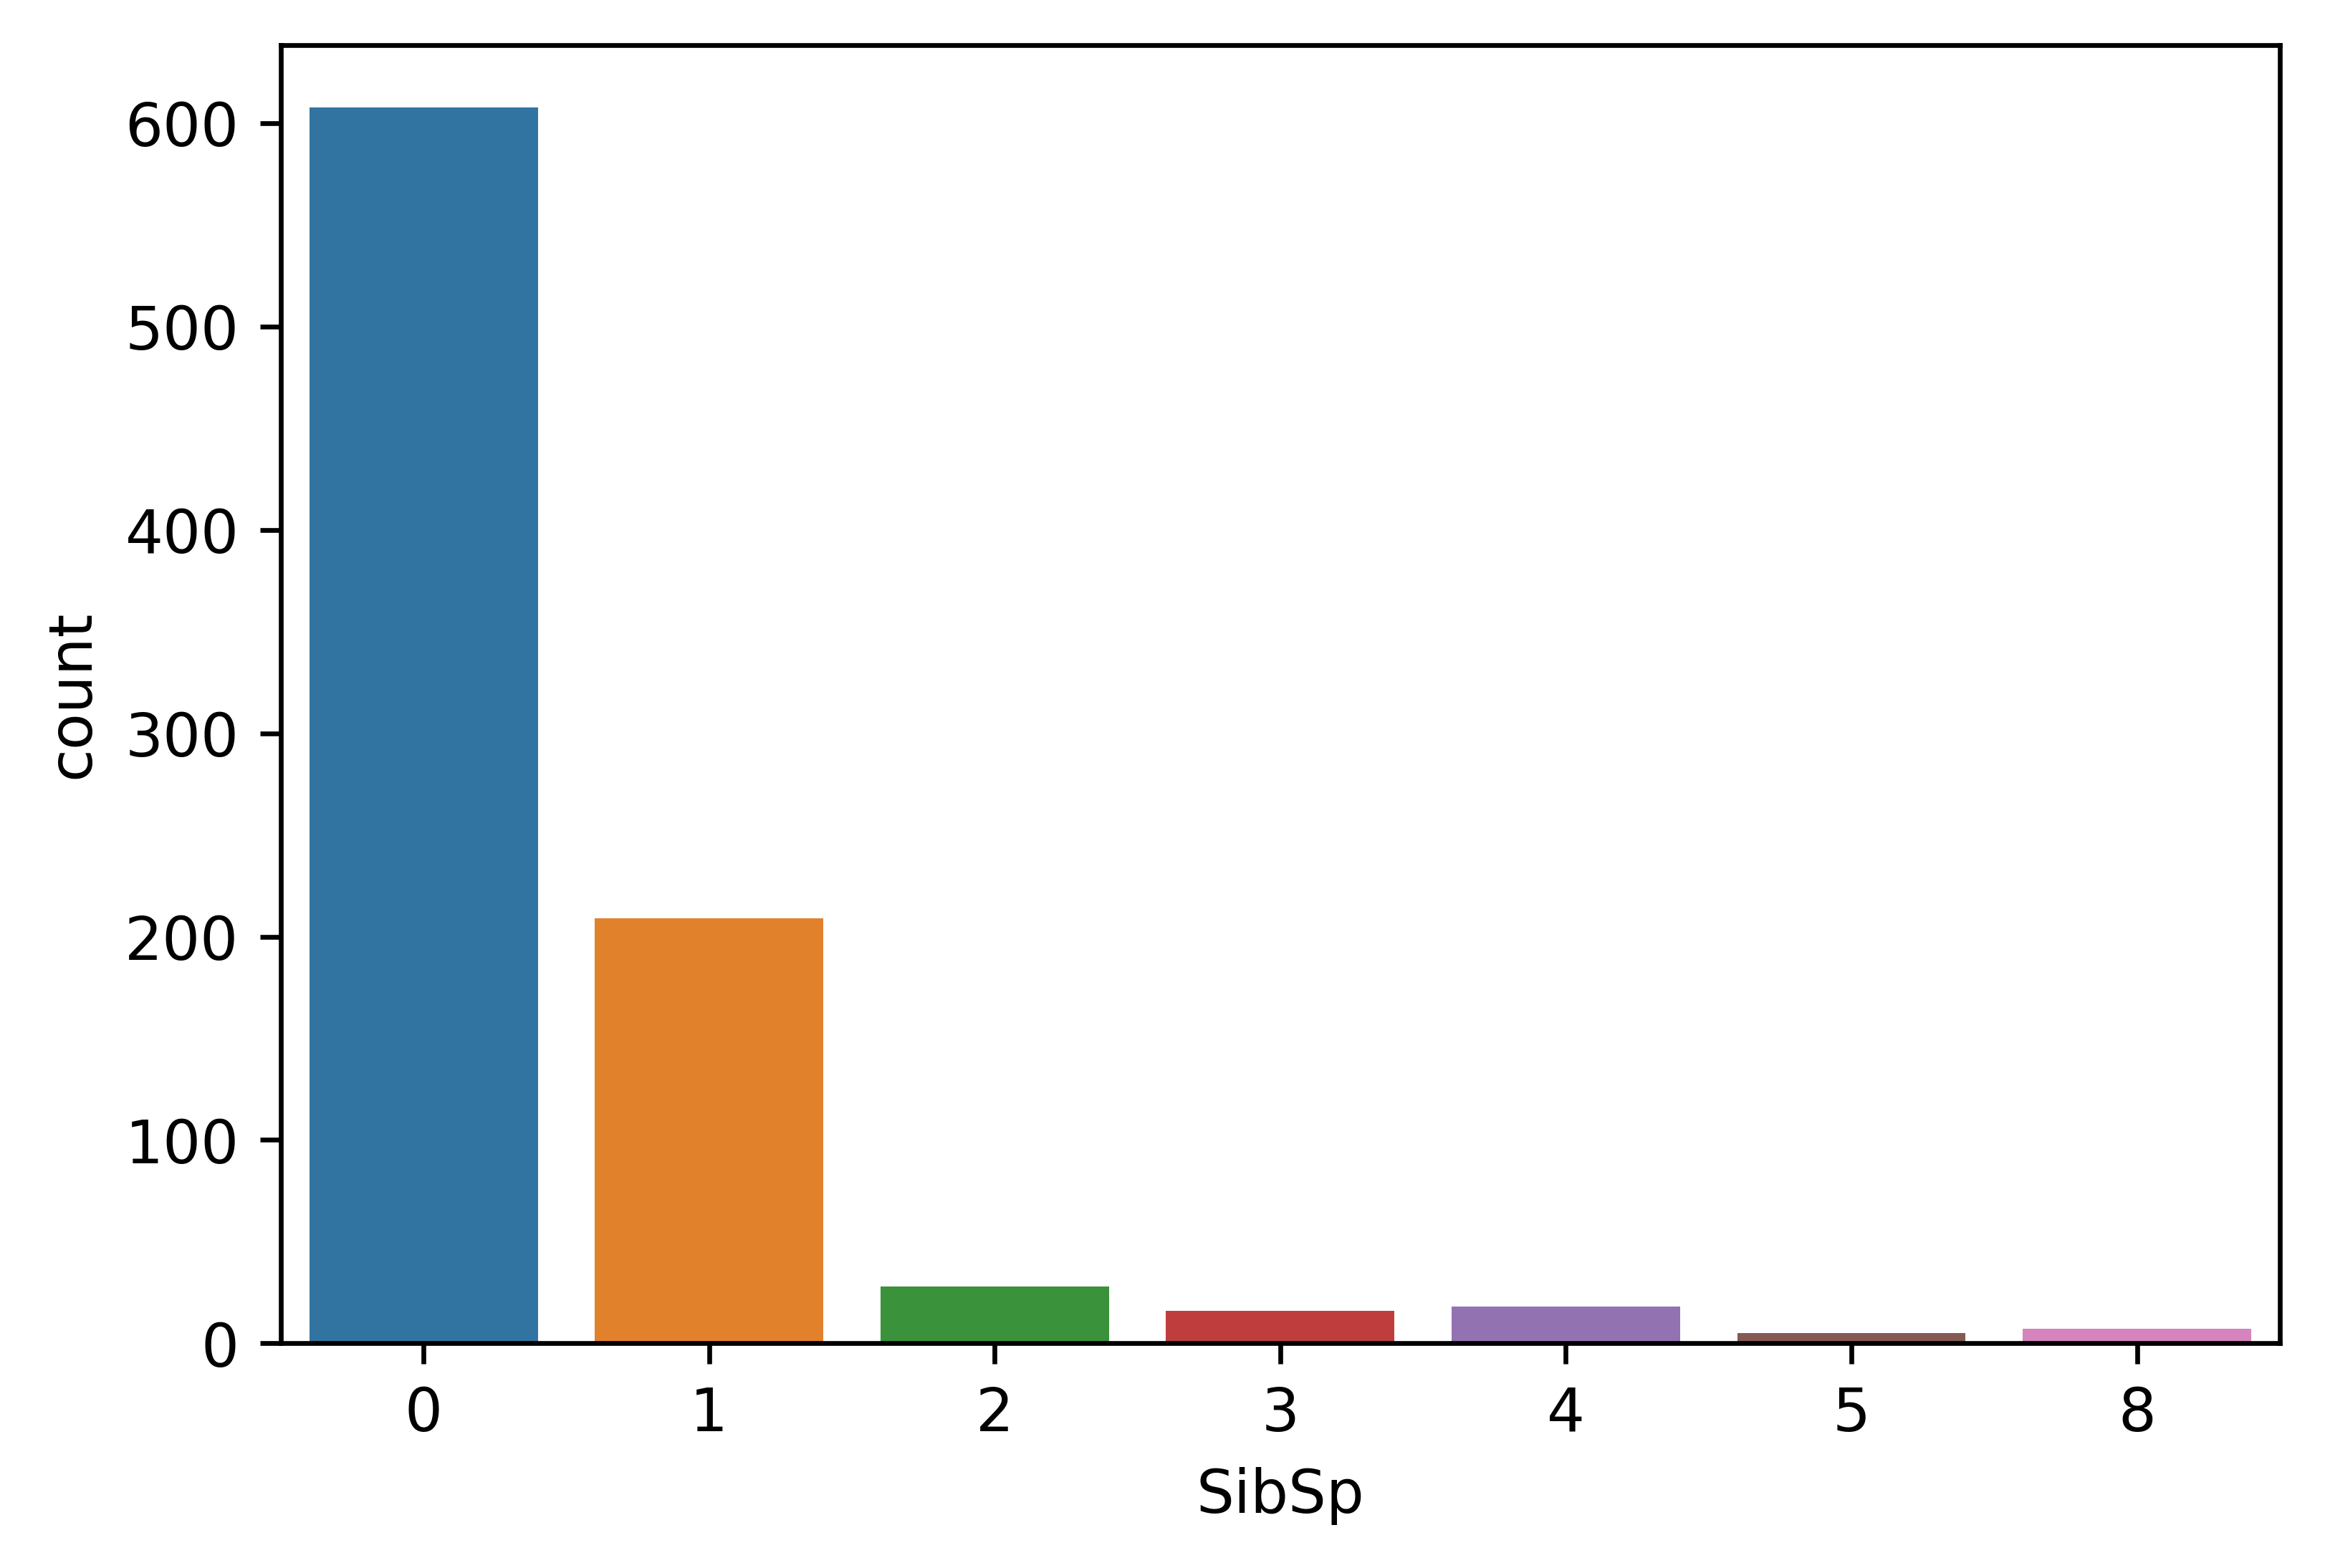

In [271]:
# Let check the number of sibling r spouse on board
fig = plt.figure(dpi = 600)
sns.countplot(x = titanic_train['SibSp'])

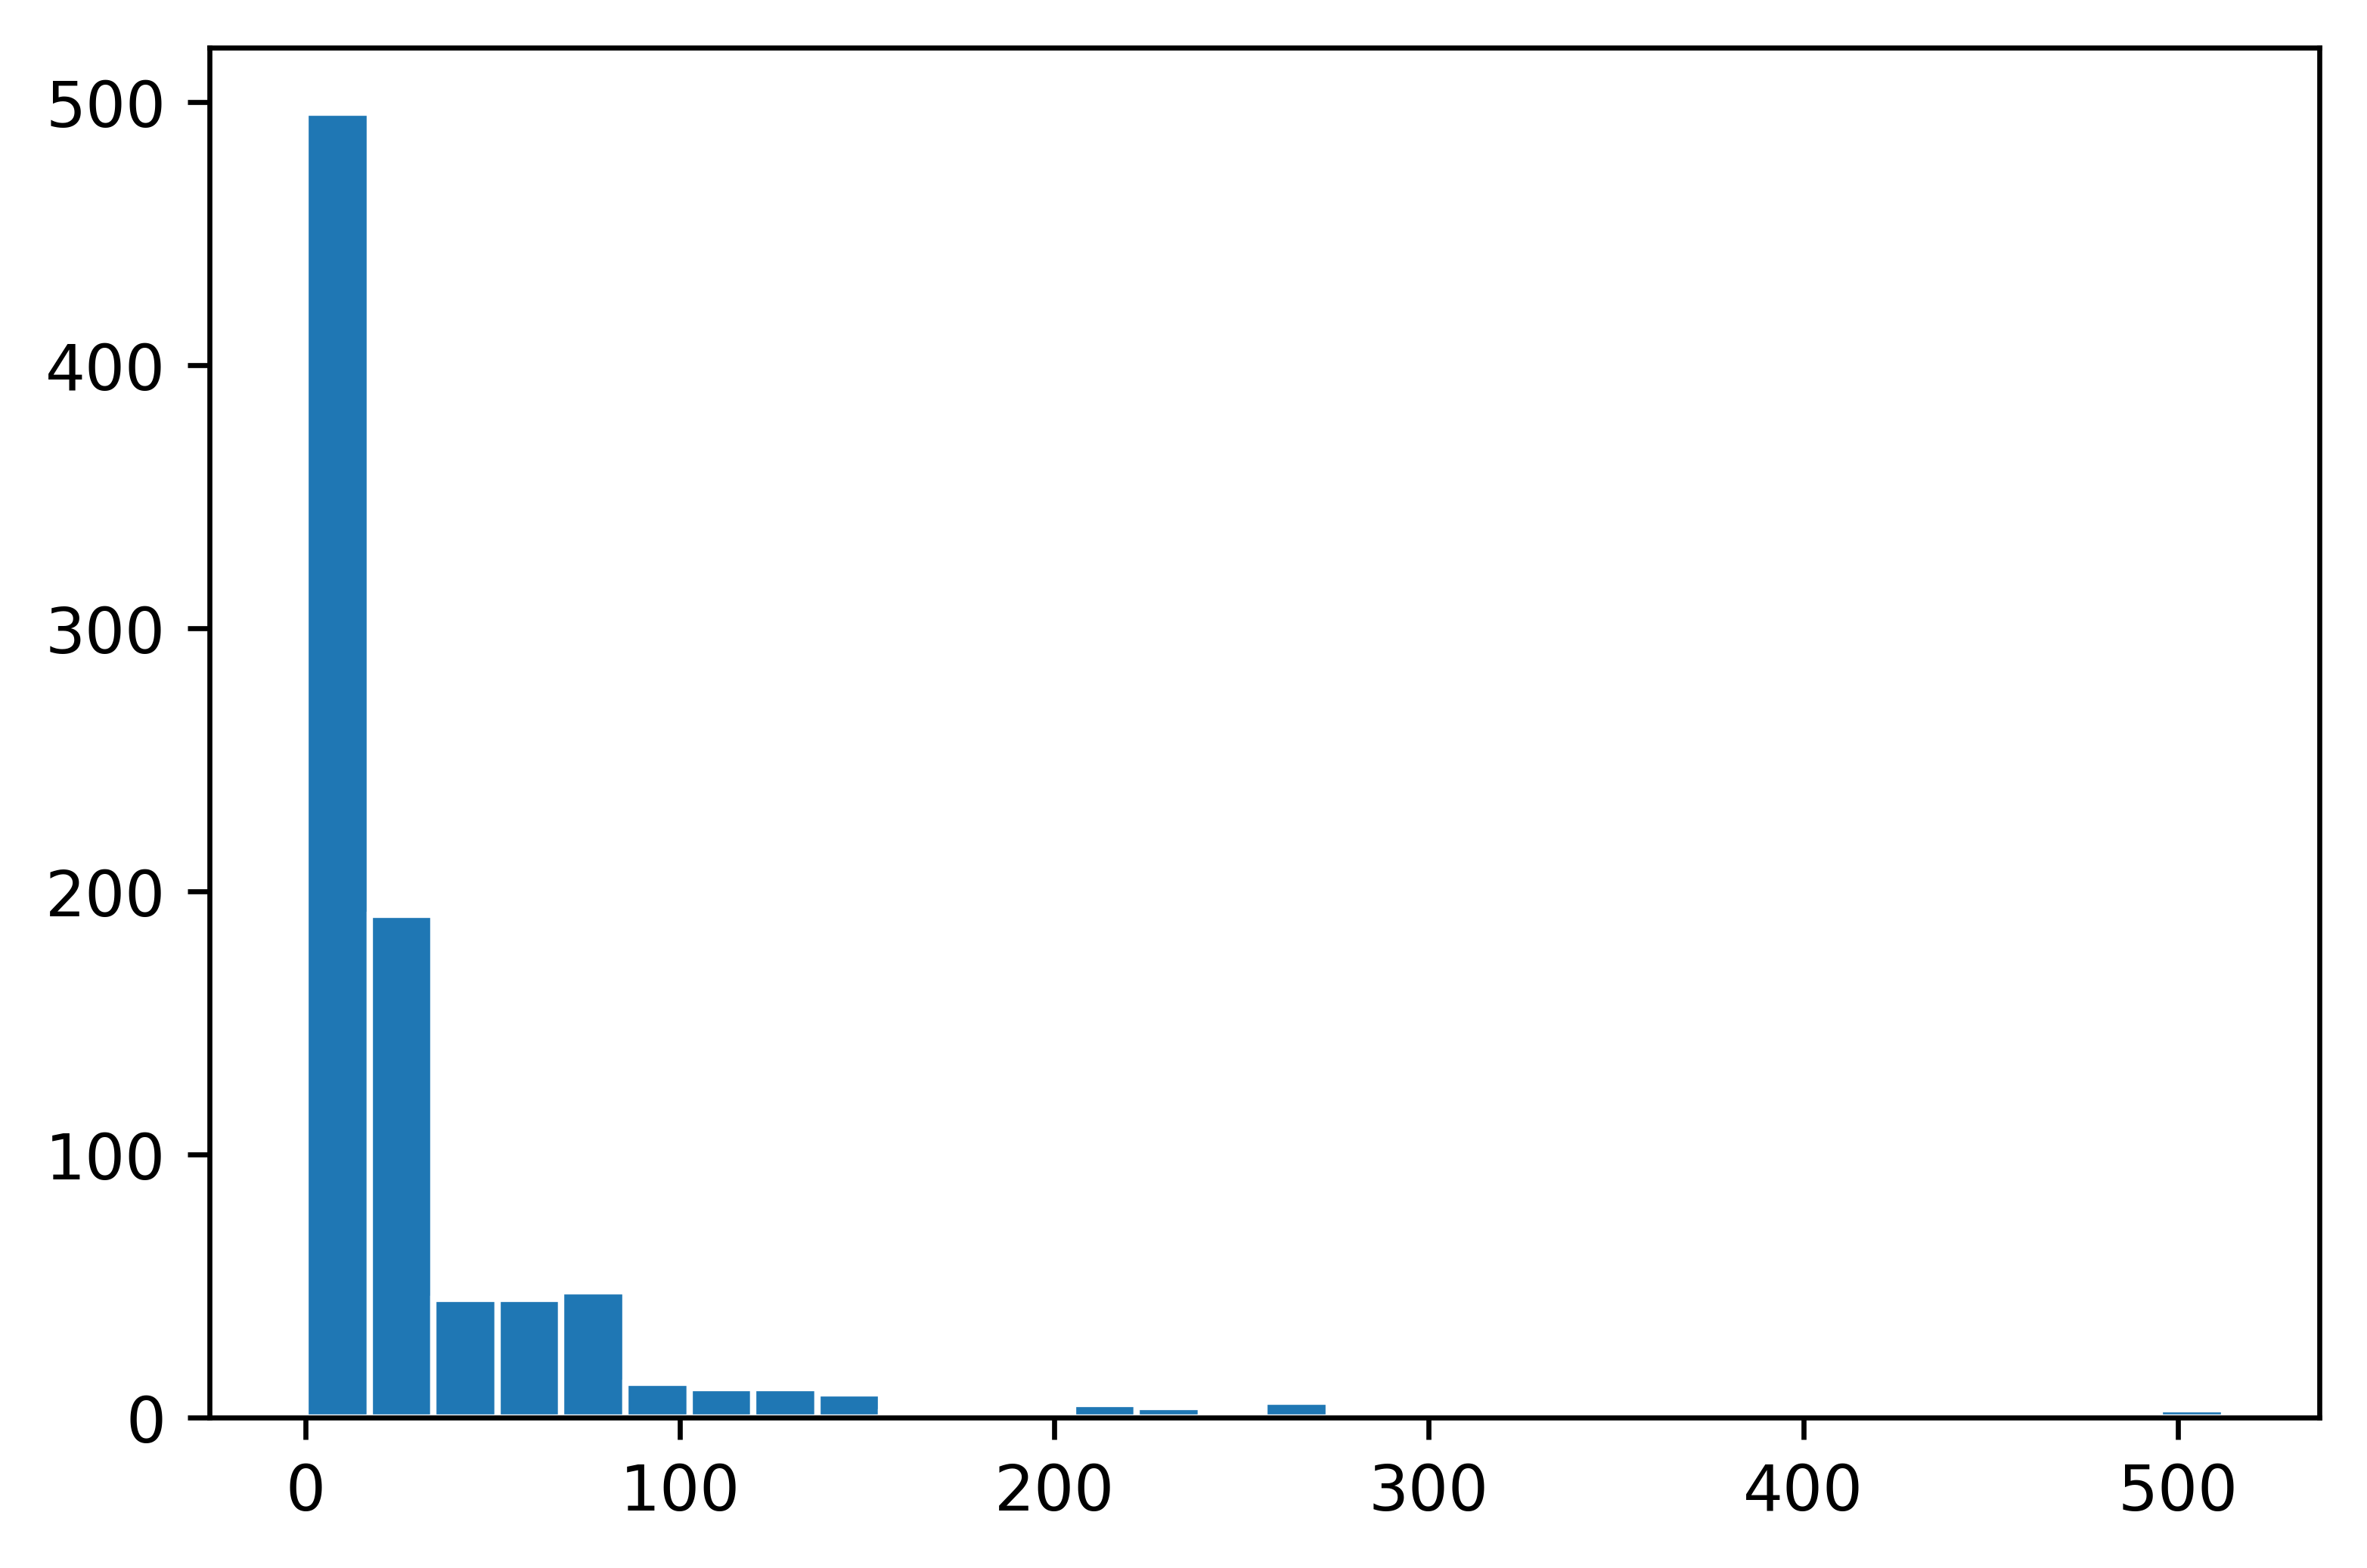

In [272]:
fig = plt.figure(dpi = 600)
titanic_train['Fare'].hist(grid=False,edgecolor='white',bins=30)

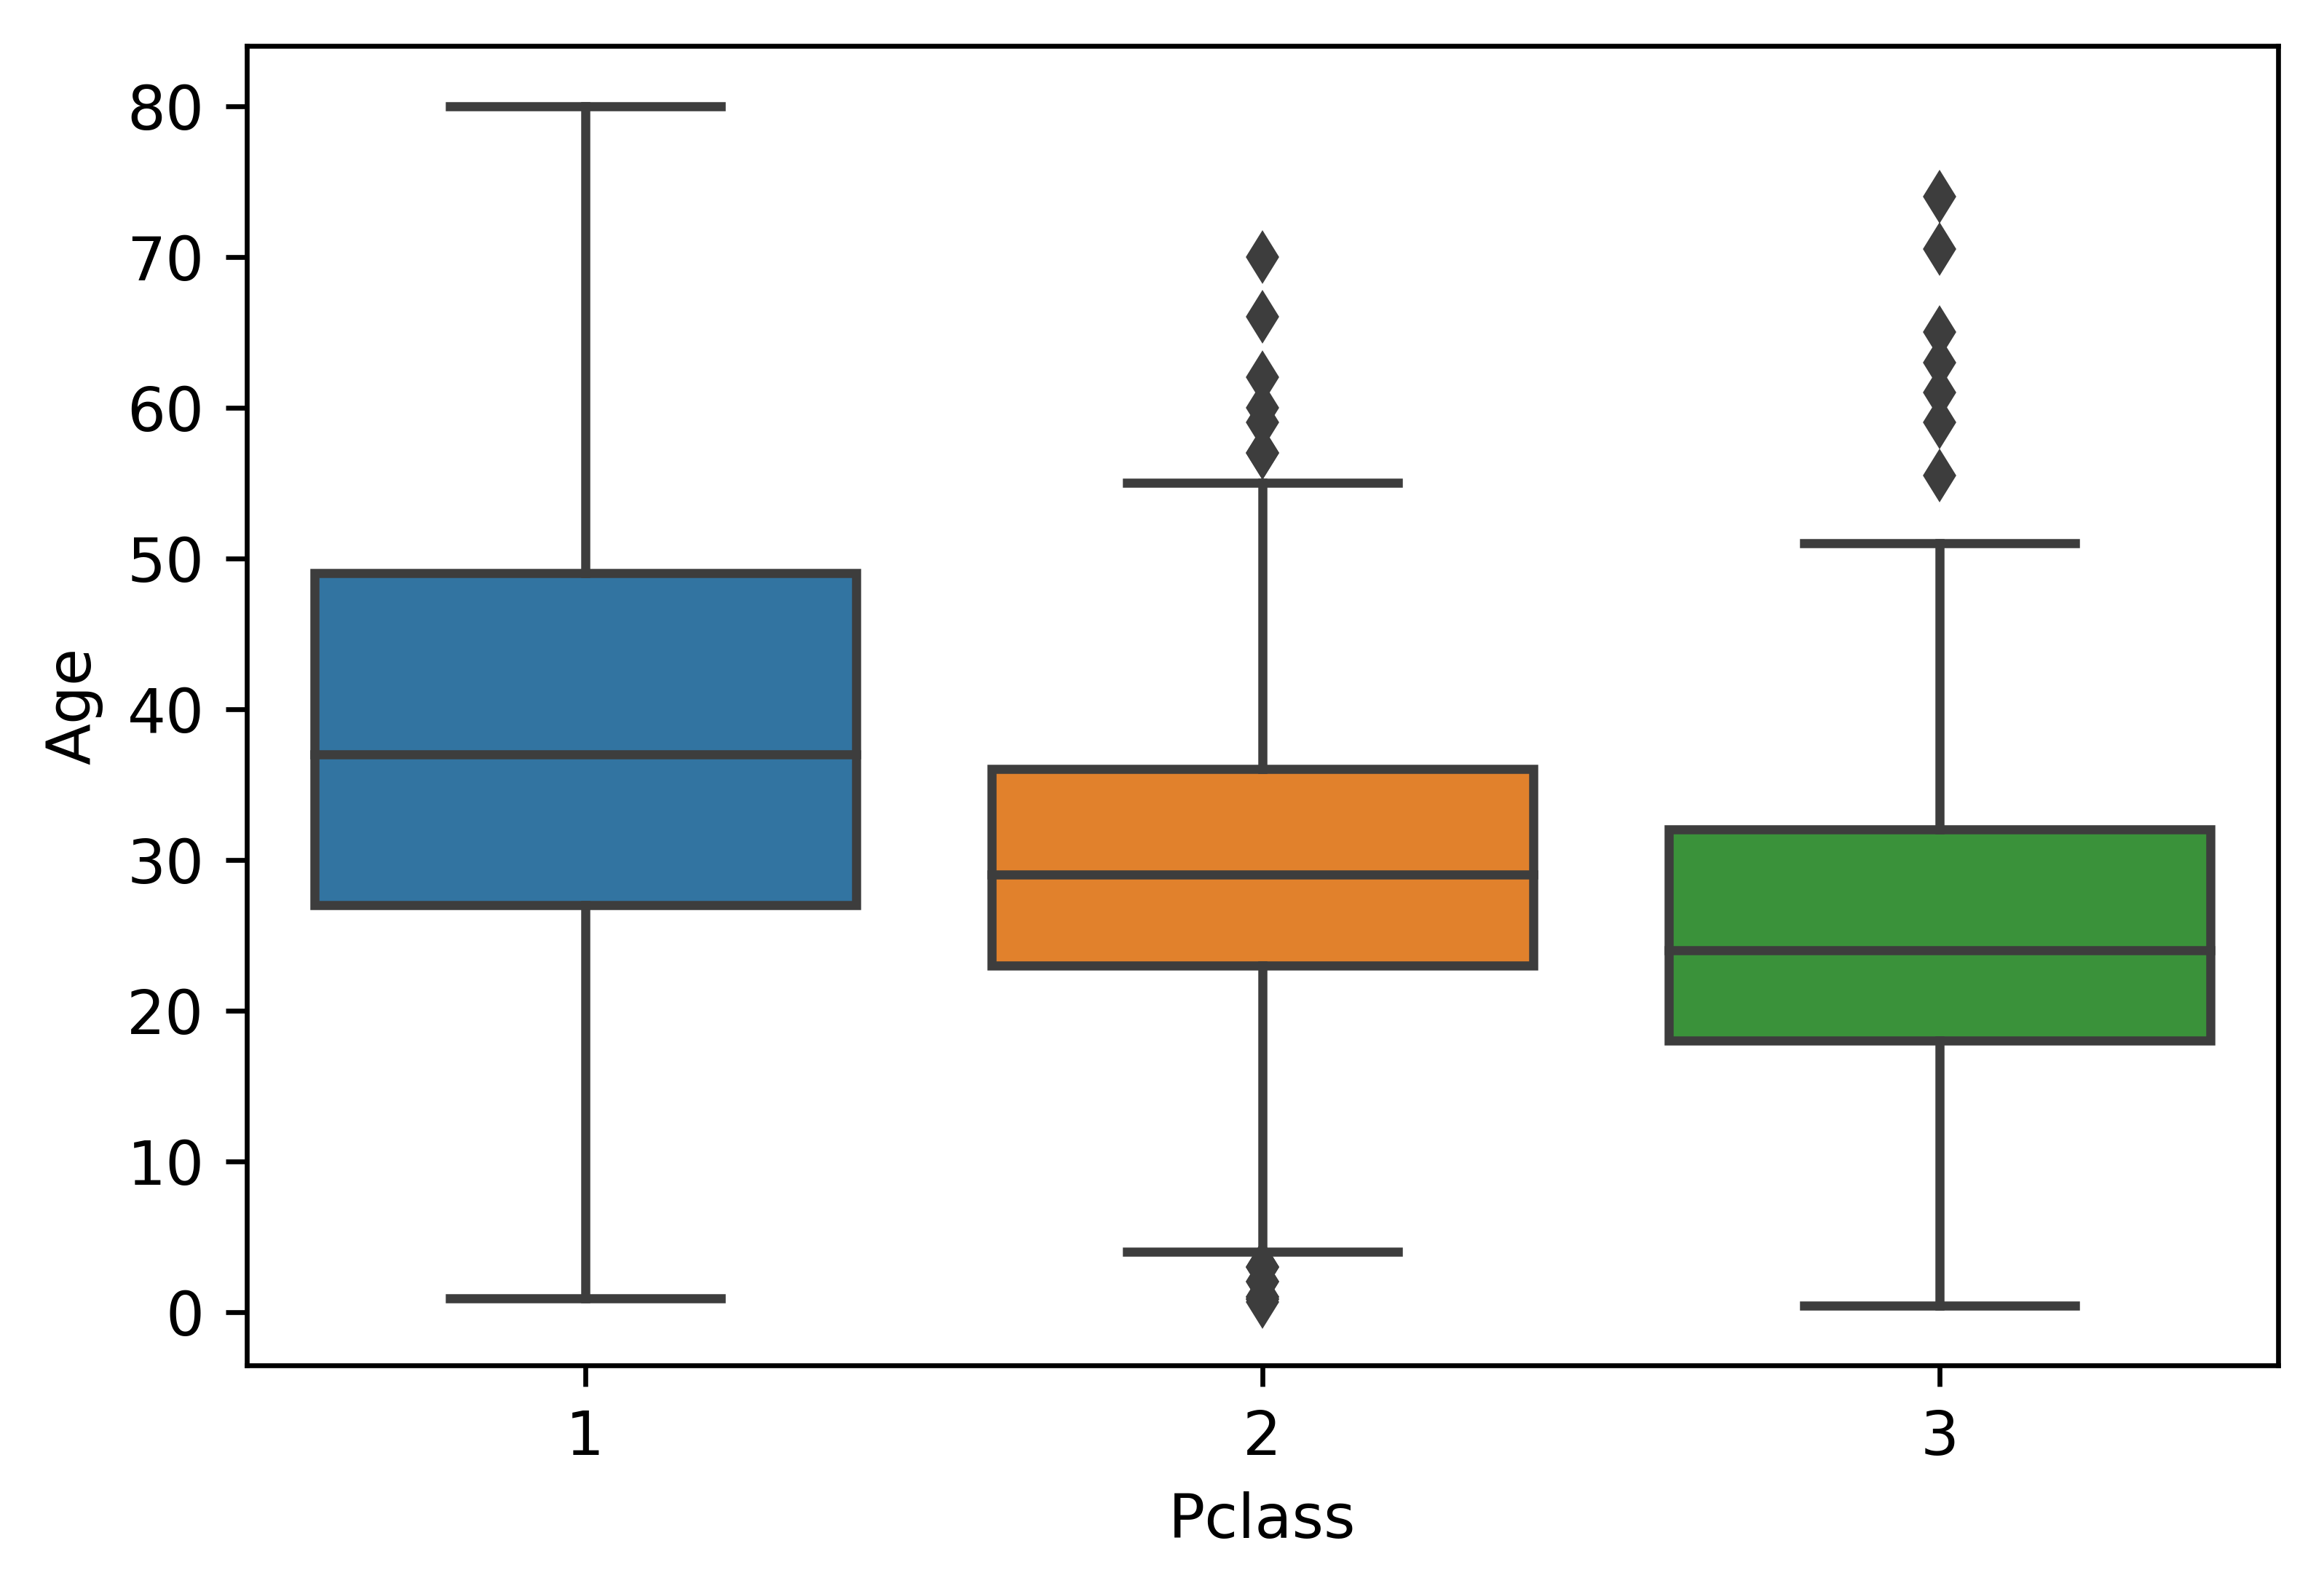

In [273]:
# lets fill the missing data for age by mean of the age or 
# better fill it with mean of age 
# based on passenger class

fig = plt.figure(dpi=600)
sns.boxplot(x='Pclass',y='Age',data=titanic_train)

In [274]:
print(titanic_train[titanic_train['Pclass']==1]['Age'].mean())
print(titanic_train[titanic_train['Pclass']==2]['Age'].mean())
print(titanic_train[titanic_train['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [275]:
def imput_age(fil):
    Age = fil[0]
    Pclass = fil[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [276]:
titanic_train['Age'] =titanic_train[['Age','Pclass']].apply(imput_age,axis=1)

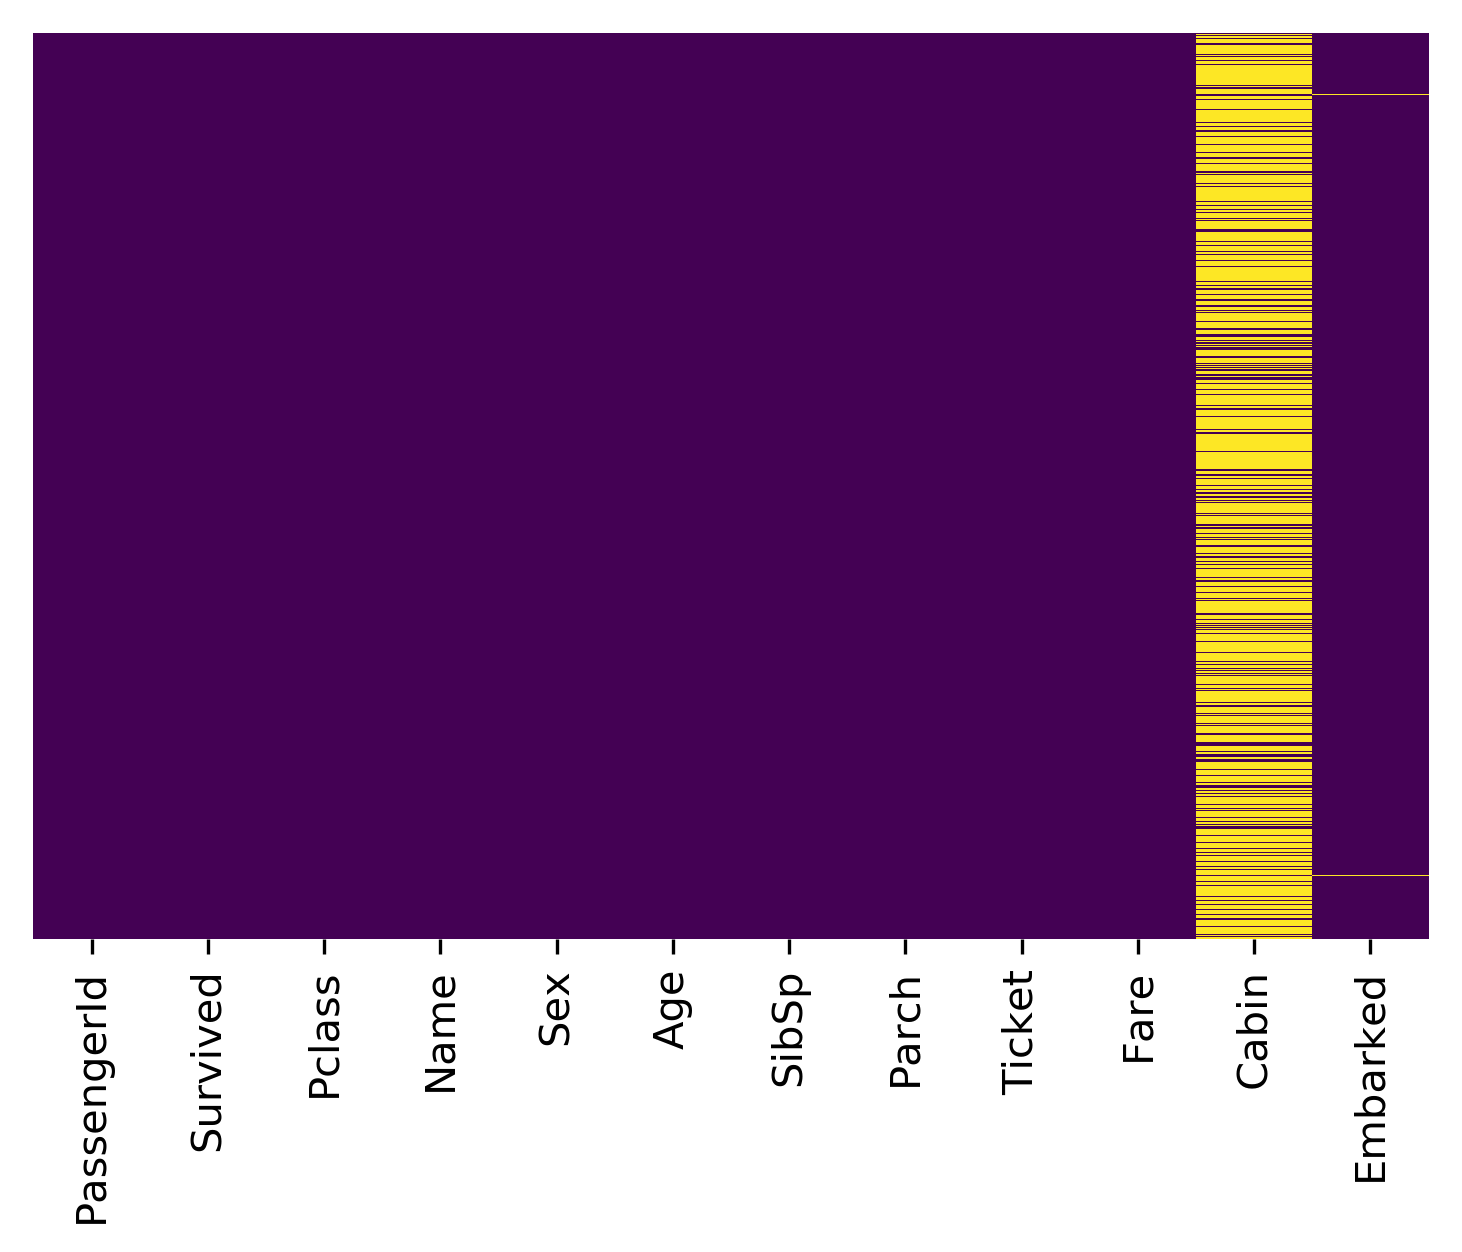

In [277]:
fig = plt.figure(dpi = 300)
sns.heatmap(titanic_train.isnull(),yticklabels=False,
           cbar=False,cmap='viridis')

In [278]:
# Lets drop the Cabin column
titanic_train.drop('Cabin', axis=1,inplace=True)

In [279]:
# Make sure thers is no missing data remain
titanic_train.dropna(inplace=True)

In [280]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [281]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [282]:
# Lets change the categorical valriable to indicator variables

Sex = pd.get_dummies(titanic_train['Sex'], drop_first=True)
Sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [283]:
Embarked = pd.get_dummies(titanic_train['Embarked'], 
                          drop_first=True)
Embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [284]:
# Attach the new columns to dataset
titanic_train = pd.concat([titanic_train,Sex,Embarked],
                         axis=1)
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [285]:
# Here we drops the columns that we are not going to use but
# we can do to feature engineering to use colums like Name if
# it is needed
titanic_train.drop(['Name','Sex','Ticket','Embarked','PassengerId'],
                   axis=1,inplace=True)
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [286]:
# Seperate data to train and test data
from sklearn.model_selection import train_test_split

In [287]:
titanic_train.keys()

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [288]:
X = titanic_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y=titanic_train['Survived']

In [289]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.4, random_state=101)

In [290]:
from sklearn.linear_model import LogisticRegression

In [291]:
logreg = LogisticRegression()

In [292]:
logreg.fit(X_train,y_train)

C:\Users\babak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [293]:
prediction = logreg.predict(X_test)

In [294]:
# Lets evaluate our model
from sklearn.metrics import classification_report

In [295]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       216
           1       0.76      0.65      0.70       140

   micro avg       0.78      0.78      0.78       356
   macro avg       0.78      0.76      0.76       356
weighted avg       0.78      0.78      0.78       356

